In [1]:
%load_ext autoreload
%autoreload 2
import os, sys
root_dir = os.path.dirname(os.path.abspath(''))
if not root_dir in sys.path: sys.path.append(root_dir)

In [2]:
from darkMatter import *
from general.plot_statistics import *
from general.utils import set_plot_params

from DM_theory import *

In [3]:
cd ..

/home/wollex/Data/Science/WolfGroup/DarkMatter/Programme


In [19]:
steps = 100     # correct for removal of first item

L = 1
S = [1,2]

J_l = np.ones((L,L))
np.fill_diagonal(J_l,0)

options = {
    # count of layers, populations, PSPs
    'L': L,
    'P': 2,
    'S': S,     # contains number of synapses for each population

    # layer level parameters
    'eps': 1./np.sqrt(2),
    'eta': 0.9,
    'J0_l': J_l,
    'kappa': 1.,

    # population level parameters
    'I_ext': 1,
    'rateWnt': 1.,
    'alpha_0': 0.02,
    'tau_M': 0.01,
    'J0': 1.,

    # psp level parameters
    'tau_I': [0.01,0.005,0.2],
    'tau_n': 0.,
    'tau_norm': 1.,

    # 'order': ['tau_G','n','alpha_0','rateWnt','eta','eps'],
    'mode': 0,
    'mode_stats': 0,
    'mode_calc': 0,
    'simulation': {
        # for each iteration parameter, specify (layer,population,psp)-tuple
        # specify -1 if a level of hierarchy is non-applicable
        # specify 'None' if should be applied to all candidates
        'rateWnt': [0.,20.],
        'tau_n': [0.,1.],

        'sim_prim': [0,-1,0],       # when population parameters are iterated, specify population number(s) (empty = all)
        'sim_sec': [0,1,1],     # when synaptic timeconstants are iterated, specify number within population
    }
}

In [20]:
res = darkMatter(steps=steps,options=options,rerun=True,compile=False)

Dimension epsSz not found!
Dimension etaSz not found!
Dimension alpha_0Sz not found!
Dimension tau_ISz not found!
Dimension I_alphaSz not found!
Dimension I_betaSz not found!


In [21]:
res.keys()

dict_keys(['rateWnt', 'tau_n', 'q', 'gamma', 'chi', 'delta', 'I_balance', 'regions', 'inc_trans', 'imp_trans', 'DM_trans', 'np_trans'])

In [22]:
order = list(options['simulation'].keys())

In [23]:
net = network(**options)

In [24]:
net.sigma_V(nu=np.array([[1.],[1.]]),p=0)

array([0.04212868])

In [25]:
net.gamma(nu=np.array([[1.],[1.]]),q=np.array([[1.1],[1.1]]),r=0.9,p=1)

array([1.52152445])

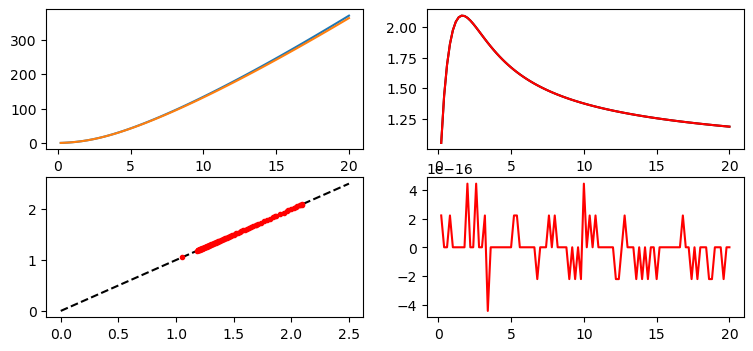

In [31]:
fig, ax = plt.subplots(2,2,figsize=(9,4))
p=0
i=10

gamma_net = net.gamma(nu=np.tile(res['rateWnt'],(2,1)),q=res['q'][:,i,:],r=res['tau_n'][i],p=p)
ax[0][0].plot(res['rateWnt'],res['q'][0,i,:])
ax[0][0].plot(res['rateWnt'],res['q'][1,i,:])

ax[0][1].plot(res['rateWnt'],res['gamma'][p,i,:],'k-')
ax[0][1].plot(res['rateWnt'],gamma_net,'r-')

ax[1][0].plot([0,2.5],[0,2.5],'k--')
ax[1][0].plot(res['gamma'][p,i,:],net.gamma(nu=np.tile(res['rateWnt'],(2,1)),q=res['q'][:,i,:],r=res['tau_n'][i],p=p),'r.')

ax[1][1].plot(res['rateWnt'],res['gamma'][p,i,:]-gamma_net,'r-')
plt.show()

In [68]:
np.tile(res['rateWnt'][i1],(2,1))

array([[2.2],
       [2.2]])

<IPython.core.display.Javascript object>


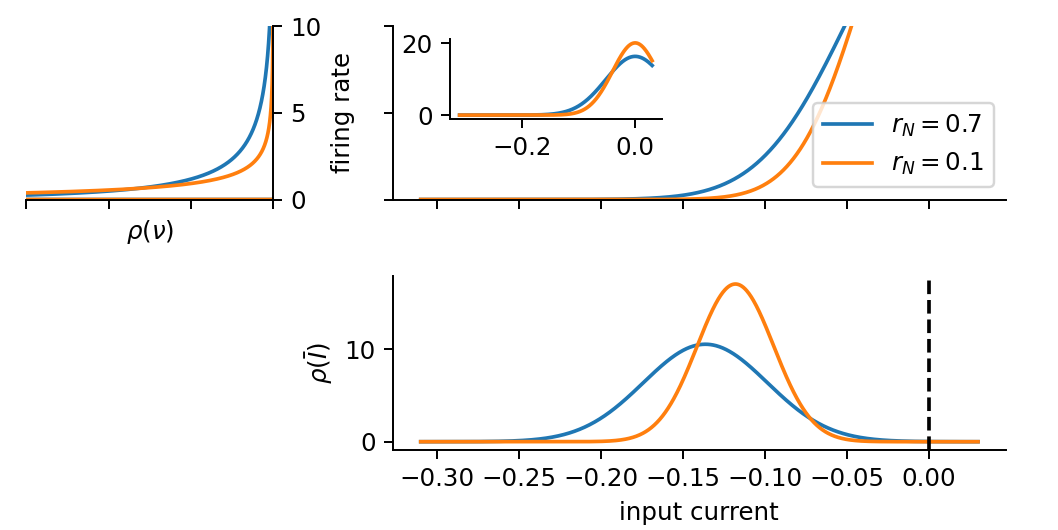

rate=2.0, r=0.7000000000000001
gamma=1.5419839803238498, delta=3.5956792665450306
[16.37097486]
rate=0.6000000000000001, r=0.1
gamma=1.6930344685767955, delta=5.053250906256041
[20.12653113]


In [230]:
%matplotlib nbagg
p = 1
i1 = 30 # idx in tau_n
i2 = 10 # idx in rate
net = network(**options)

fig = plt.figure(figsize=(6,3))
gs = fig.add_gridspec(2,3)

ax_I = fig.add_subplot(gs[1,1:])
ax_response = fig.add_subplot(gs[0,1:])
ax_fr = fig.add_subplot(gs[0,0])

ax_response_inset = fig.add_subplot()
plt.setp(ax_response_inset,position=[0.725,0.7,0.2,0.15])
#ax_fr.invert_xaxis()

def plot_distributions(axes,net,i1,i2,p):
    
    print(f"rate={res['rateWnt'][i2]}, r={res['tau_n'][i1]}")
    print(f"gamma={res['gamma'][p,i1,i2]}, delta={res['delta'][p,i1,i2]}")
    
    net.r = res['tau_n'][i1]
    alpha = net.alpha(res['q'][:,i1,i2],p)
    sigma_V = net.sigma_V(np.tile(res['rateWnt'][i2],(2,1)),p)

    I_arr = np.linspace(-0.31,0.03,1001)
    I_distr = 1/(np.sqrt(2*np.pi)*alpha)*np.exp(-(I_arr + res['I_balance'][p,i1,i2])**2/(2*alpha**2))
    axes[0].plot(I_arr,I_distr)

    nu_max = net.rate_max(np.tile(res['rateWnt'][i2],(2,1)),p)
    print(nu_max)
    nu_response = nu_max * np.exp(-I_arr**2/(2*sigma_V**2))
    axes[1][0].plot(I_arr,nu_response,label=f"$r_N = {res['tau_n'][i1]:.1f}$")
    axes[1][1].plot(I_arr,nu_response)

    nu_arr, distr = net.distribution(np.tile(res['rateWnt'][i2],(2,1)),res['q'][:,i1,i2],p,steps=10001)
    axes[2].plot(distr,nu_arr*nu_max)

plot_distributions([ax_I,[ax_response,ax_response_inset],ax_fr],net,69,9,p)
plot_distributions([ax_I,[ax_response,ax_response_inset],ax_fr],net,9,2,p)

ax_I.axvline(0,color='k',ls='--')
plt.setp(ax_fr,xlim=[0.6,0],ylim=[0,10.],xlabel=r'$\rho(\nu)$',ylabel='firing rate')
plt.setp(ax_response,ylim=[0,10.])
plt.setp(ax_I,xlabel='input current',ylabel=r'$\rho(\bar{I})$')

ax_response.spines[['top','right']].set_visible(False)
ax_response_inset.spines[['top','right']].set_visible(False)
ax_fr.spines[['top','left']].set_visible(False)
ax_I.spines[['top','right']].set_visible(False)

ax_fr.tick_params(labelbottom=False, labeltop=False, labelleft=False, labelright=True,
                    bottom=True, top=False, left=False, right=True)
ax_fr.yaxis.set_label_position('right')

ax_response.tick_params(labelbottom=False, labeltop=False, labelleft=False, labelright=False,
                    bottom=True, top=False, left=True, right=False)

ax_response.legend(loc='lower right')
plt.tight_layout(rect=[0, 0.1, 1, 1.])
plt.setp(ax_response_inset,position=[0.425,0.775,0.2,0.15])

#plt.plot(np.linspace(0,1,11),net.sigma_V_dot(nu=np.array([[1.],[1.]]),r=np.linspace(0,1,11)))
plt.show()

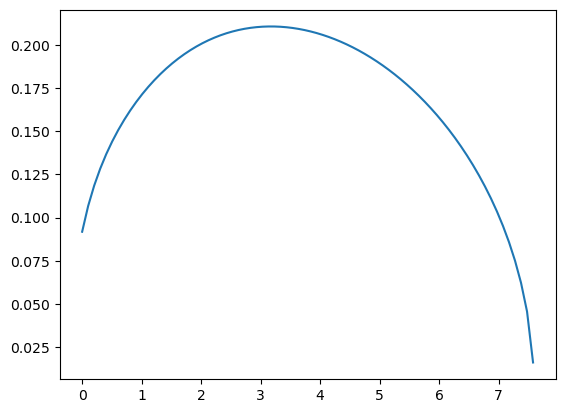

In [119]:
plt.figure()
plt.plot(np.linspace(0,10,100),res['I_balance'][0,10,:])
plt.show()